In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsbombpy import sb
import numpy as np
from mplsoccer import VerticalPitch, FontManager

In [25]:
partido = sb.events(match_id=3869685)
def separar_x(string):
    x = string.split(',')[0].replace('[','')
    return x

def separar_y(string):
    y = string.split(',')[1].replace(']','')
    return y


In [16]:
partido.player.value_counts()

player
Enzo Fernandez                     328
Rodrigo Javier De Paul             242
Lionel Andrés Messi Cuccittini     242
Nicolás Hernán Otamendi            215
Jules Koundé                       211
Aurélien Djani Tchouaméni          205
Cristian Gabriel Romero            203
Dayotchanculle Upamecano           198
Alexis Mac Allister                196
Raphaël Varane                     182
Adrien Rabiot                      176
Nicolás Alejandro Tagliafico       165
Julián Álvarez                     150
Kylian Mbappé Lottin               149
Theo Bernard François Hernández    145
Nahuel Molina Lucero               142
Ángel Fabián Di María Hernández    132
Randal Kolo Muani                  127
Marcus Thuram                      119
Marcos Javier Acuña                112
Antoine Griezmann                  103
Hugo Lloris                         97
Kingsley Coman                      85
Damián Emiliano Martínez            83
Eduardo Camavinga                   83
Gonzalo Ariel Mont

In [19]:
messi = partido[partido['player'] == 'Lionel Andrés Messi Cuccittini'].reset_index(drop=True)

In [21]:
messi.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id'

In [23]:
messi.type.value_counts()

type
Ball Receipt*      74
Pass               60
Carry              53
Pressure           17
Ball Recovery       7
Dispossessed        6
Shot                6
Dribble             3
Duel                3
Miscontrol          3
Foul Committed      2
Foul Won            2
Clearance           1
Block               1
Injury Stoppage     1
Player Off          1
Player On           1
Offside             1
Name: count, dtype: int64

In [38]:
messi.pass_outcome.value_counts()

pass_outcome
Incomplete      10
Pass Offside     1
Name: count, dtype: int64

C:\Users\federab\AppData\Local\Temp\ipykernel_132416\4180347661.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recepciones[['x', 'y']] = recepciones.location.apply(pd.Series)
C:\Users\federab\AppData\Local\Temp\ipykernel_132416\4180347661.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recepciones[['x', 'y']] = recepciones.location.apply(pd.Series)
C:\Users\federab\AppData\Local\Temp\ipykernel_132416\4180347661.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

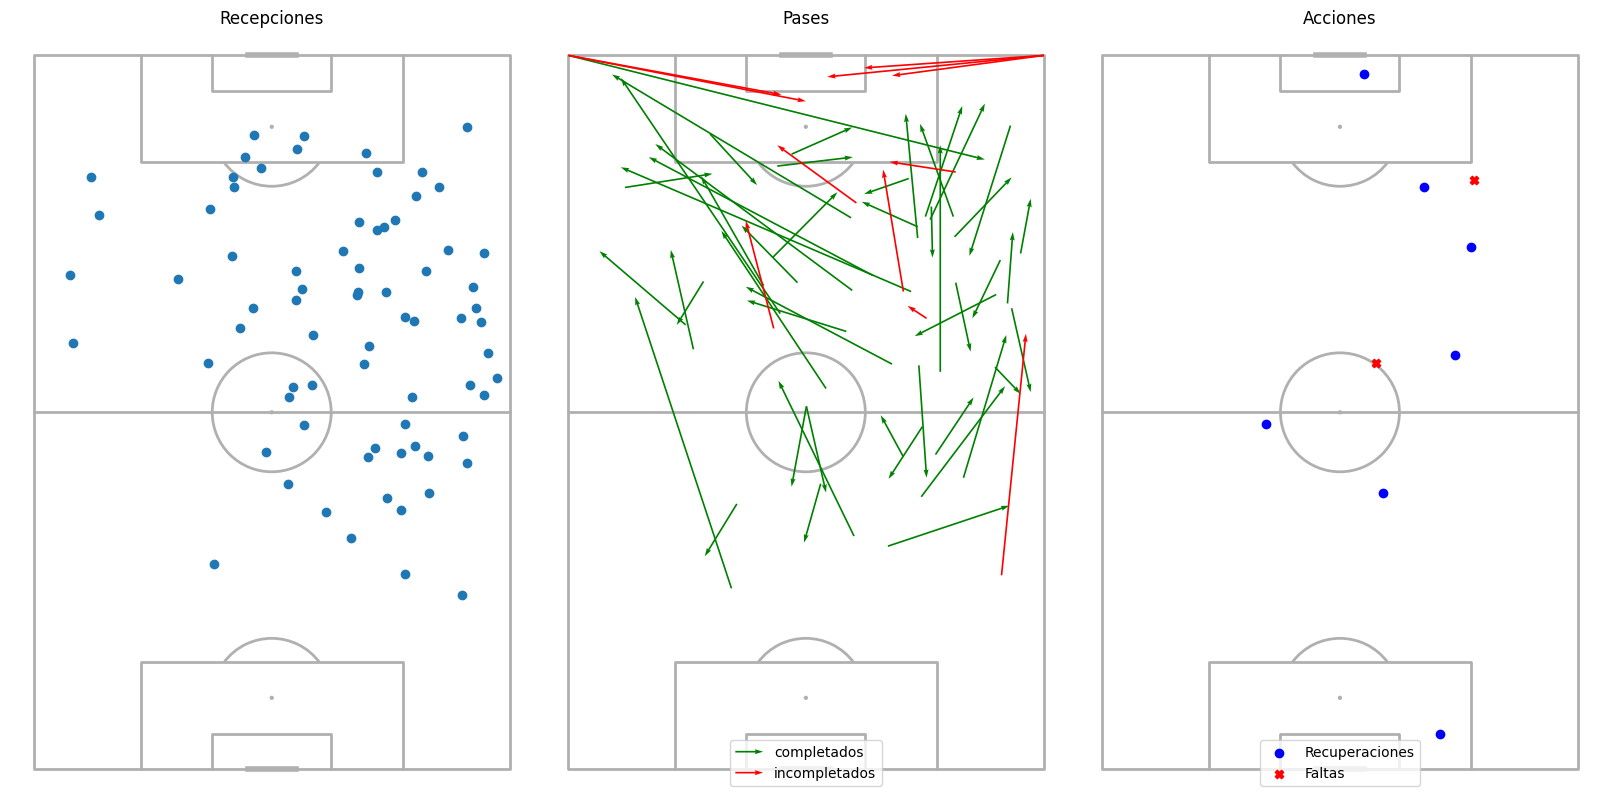

In [43]:
fig = plt.figure(figsize=(16,9),constrained_layout=True)
gs = fig.add_gridspec(nrows=2,ncols=3)
fig.set_facecolor('white')
pitch = VerticalPitch(pitch_type='statsbomb')

ax1 = fig.add_subplot(gs[0:2,0])
ax1.set_title('Recepciones')
recepciones = messi[messi['type'] == 'Ball Receipt*']
recepciones[['x', 'y']] = recepciones.location.apply(pd.Series)
pitch.draw(ax=ax1)
pitch.scatter(recepciones.x, recepciones.y, ax=ax1)

ax2 = fig.add_subplot(gs[0:2,1])
ax2.set_title('Pases')
pases = messi[messi['type'] == 'Pass']
pases[['x', 'y']] = pases.location.apply(pd.Series)
pases[['end_x', 'end_y']] = pases.pass_end_location.apply(pd.Series)
pases_comp = pases[pases['pass_outcome'].isna() == True]
pases_incomp = pases[pases['pass_outcome'].isna() != True]
pitch.draw(ax=ax2)
pitch.arrows(pases_comp.x, pases_comp.y, pases_comp.end_x, pases_comp.end_y, ax=ax2, width=1.2, color='green', label='completados')
pitch.arrows(pases_incomp.x, pases_incomp.y, pases_incomp.end_x, pases_incomp.end_y, ax=ax2, width=1.2, color='red', label='incompletados')
ax2.legend(loc='lower center')

ax3 = fig.add_subplot(gs[0:2,2])
ax3.set_title('Acciones')
recup = messi[messi['type'] == 'Ball Recovery']
recup[['x', 'y']] = recup.location.apply(pd.Series)
faltas = messi[messi['type'] == 'Foul Committed']
faltas[['x', 'y']] = faltas.location.apply(pd.Series)
pitch.draw(ax=ax3)

pitch.scatter(recup.x, recup.y, ax=ax3, marker = 'o', color='blue', label='Recuperaciones')
pitch.scatter(faltas.x, faltas.y, ax=ax3, marker = 'X', color='red', label='Faltas')

ax3.legend(loc='lower center')
